# Practical Statistics for Data Scientists (Python)
# Chapter 1. Exploratory Data Analysis
> (c) 2019 Peter C. Bruce, Andrew Bruce, Peter Gedeck

In [2]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
# from statsmodels import robust
# import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

Define paths to data sets.

# Estimates of Location
## Example: Location Estimates of Population and Murder Rates

In [7]:
# Table 1-2
state = pd.read_csv("D:\PSFDS\psfds\data\state.csv")
print(state.head(10))

         State  Population  Murder.Rate Abbreviation
0      Alabama     4779736          5.7           AL
1       Alaska      710231          5.6           AK
2      Arizona     6392017          4.7           AZ
3     Arkansas     2915918          5.6           AR
4   California    37253956          4.4           CA
5     Colorado     5029196          2.8           CO
6  Connecticut     3574097          2.4           CT
7     Delaware      897934          5.8           DE
8      Florida    18801310          5.8           FL
9      Georgia     9687653          5.7           GA


Compute the mean, trimmed mean, and median for Population. For `mean` and `median` we can use the _pandas_ methods of the data frame. The trimmed mean requires the `trim_mean` function in _scipy.stats_.

In [8]:
print(state['Population'].mean())

6162876.3


In [9]:
print(trim_mean(state['Population'], 0.1))

4783697.125


In [10]:
print(state['Population'].median())

4436369.5


In [11]:
print(state['Murder.Rate'].mean())

4.066


In [12]:
print(np.average(state['Murder.Rate'], weights=state['Population']))

4.445833981123393


# Estimates of Variability

In [13]:
# standard deviation
print(state['Population'].std())

6848235.347401142


In [14]:
# Interquartile range is calculated as the difference of the 75% and 25% quantile.
print(state['Population'].quantile(0.75) - state['Population'].quantile(0.25))

4847308.0


## Percentiles and Boxplots
_Pandas_ has the `quantile` method for data frames.

In [15]:
print(state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64


In [16]:
# Table 1.4
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(state['Murder.Rate'].quantile(percentages))
df.index = [f'{p * 100}%' for p in percentages]
print(df.transpose())

             5.0%  25.0%  50.0%  75.0%  95.0%
Murder.Rate   1.6  2.425    4.0   5.55   6.51


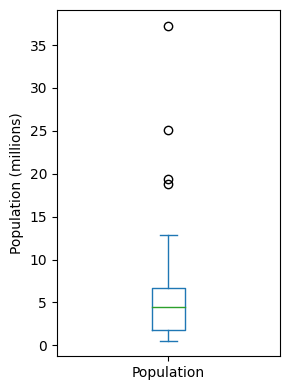

In [17]:
ax = (state['Population']/1_000_000).plot.box(figsize=(3, 4))
ax.set_ylabel('Population (millions)')

plt.tight_layout()
plt.show()